# AEDA Capstone

In this use case one table related to **telecom customer churn** has been shared with you. The data contains features of each user and the **target variable** whether the customer churn or not.

## Objective:

1. Why do you think the customers churn in this context? 
    
    **Hint:** After data cleaning and Exploratory Data Analysis, what is the biggest difference between the Churned/non-Churned users?


2. What would you do for further investigation?

    **Hint:** Based on your answer regarding Objective1, you will have a hypothesis about the Churned users. Just explain how would you act based on this insight. 


3. If you would like to investigate customer satisfaction, what would you do?

    **Hint:** Assume you have already created a questionnaire and need your users to answer that. How would you manage this process to collect data? 


4. If you would like to interview maximum 250 users from both churned/non-churned users **in person** to investigate customer satisfaction, what would you do if you have budget to travel to only 5 States? Is this sample a good representative sample of the population regarding Churn? 


5. Assume you need to share this dataset on a database so that other teams have access to this data and analyse it.

    a - Create a database including this dataset and the sample you have created for Objective4.
    
    b - Check if this sample is a representative sample of the population regarding Churn using SQL (Without visualization)

|  Name  | Description | Value Type |
|---         |--:       |     |
| **State** | State abbreviation (like KS = Kansas) | Categorical |
| **Account length** | How long the client has been with the company | Numerical | 
| **Area code** | Phone number prefix | Numerical | 
| **International plan** | International plan (on/off) | Categorical, "Yes"/"No" | 
| **Voice mail plan** | Voicemail (on/off) | Categorical, "Yes"/"No" | 
| **Number vmail messages** | Number of voicemail messages | Numerical | 
| **Total day minutes** |  Total duration of daytime calls | Numerical | 
| **Total day calls** | Total number of daytime calls  | Numerical | 
| **Total day charge** | Total charge for daytime services | Numerical | 
| **Total eve minutes** | Total duration of evening calls | Numerical | 
| **Total eve calls** | Total number of evening calls | Numerical | 
| **Total eve charge** | Total charge for evening services | Numerical | 
| **Total night minutes** | Total duration of nighttime calls | Numerical | 
| **Total night calls** | Total number of nighttime calls | Numerical | 
| **Total night charge** | Total charge for nighttime services | Numerical |
| **Total intl minutes** | Total duration of international calls  | Numerical | 
| **Total intl calls** | Total number of international calls | Numerical | 
| **Total intl charge** | Total charge for international calls | Numerical |
| **Customer service calls** | Number of calls to customer service | Numerical | 
| **Churn** | Customer churned | bool "TRUE"/"FALSE" | 


#  0. Import necessary Packages

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 1. Load the data

In [2]:
# Load the data into data dataframe
data = pd.read_csv("../data/telecom_churn.csv")

# 2. Look at the head of the data

In [3]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25.0,265.1m,110,$45.07,197.4m,99,$16.78,244.7m,91.0,$11.01,10.0m,3.0,$2.70,1.0,False
1,OH,107,415,No,Yes,26.0,161.6m,123,$27.47,195.5m,103,$16.62,254.4m,103.0,$11.45,13.7m,3.0,$3.70,1.0,False
2,NJ,137,415,No,No,NaN,243.4m,114,$41.38,121.2m,110,$10.30,162.6m,104.0,$7.32,12.2m,5.0,$3.29,NaN,False
3,OH,84,408,Yes,No,NaN,299.4m,71,$50.90,61.9m,88,$5.26,196.9m,89.0,$8.86,6.6m,7.0,$1.78,2.0,False
4,OK,75,415,Yes,No,NaN,166.7m,113,$28.34,148.3m,122,$12.61,186.9m,121.0,$8.41,10.1m,3.0,$2.73,3.0,False


# 3.  Practice: Exploratory Data Analysis

## 3.1 How many observations and features we have in the data? Check/Remove duplicates/Fix column types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3411 non-null   object 
 1   Account length          3411 non-null   int64  
 2   Area code               3411 non-null   int64  
 3   International plan      3411 non-null   object 
 4   Voice mail plan         3411 non-null   object 
 5   Number vmail messages   945 non-null    float64
 6   Total day minutes       3411 non-null   object 
 7   Total day calls         3411 non-null   int64  
 8   Total day charge        3411 non-null   object 
 9   Total eve minutes       3411 non-null   object 
 10  Total eve calls         3411 non-null   int64  
 11  Total eve charge        3411 non-null   object 
 12  Total night minutes     3411 non-null   object 
 13  Total night calls       3340 non-null   float64
 14  Total night charge      3411 non-null   

In [5]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

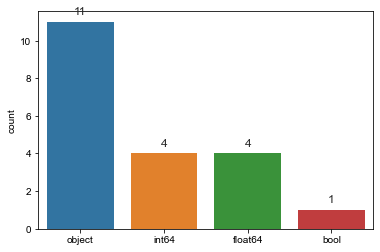

In [6]:
zx = sns.countplot(data.dtypes.map(str))
sns.set(rc={'figure.figsize':(5,5)})

#define seaborn background colors
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

# Insert Data Label
for p in zx.patches:
    zx.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

plt.show()

In [7]:
data.dtypes.value_counts()

object     11
int64       4
float64     4
bool        1
dtype: int64

### 3.1.1 Is there any duplicate in the data?

#### Hint: You can use .duplicated function. 


In [8]:
data.isna().sum()

State                        0
Account length               0
Area code                    0
International plan           0
Voice mail plan              0
Number vmail messages     2466
Total day minutes            0
Total day calls              0
Total day charge             0
Total eve minutes            0
Total eve calls              0
Total eve charge             0
Total night minutes          0
Total night calls           71
Total night charge           0
Total intl minutes           0
Total intl calls            20
Total intl charge            0
Customer service calls     716
Churn                        0
dtype: int64

In [9]:
#Original Table
len(data)

3411

In [10]:
#Clean Data from duplicated
len(data.loc[~data.duplicated()])

3333

In [11]:
#Duplicated Data
len(data.loc[data.duplicated()])

78

### 3.1.2 Remove duplicates

In [12]:
newdata = data.drop_duplicates()
newdata

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25.0,265.1m,110,$45.07,197.4m,99,$16.78,244.7m,91.0,$11.01,10.0m,3.0,$2.70,1.0,False
1,OH,107,415,No,Yes,26.0,161.6m,123,$27.47,195.5m,103,$16.62,254.4m,103.0,$11.45,13.7m,3.0,$3.70,1.0,False
2,NJ,137,415,No,No,NaN,243.4m,114,$41.38,121.2m,110,$10.30,162.6m,104.0,$7.32,12.2m,5.0,$3.29,NaN,False
3,OH,84,408,Yes,No,NaN,299.4m,71,$50.90,61.9m,88,$5.26,196.9m,89.0,$8.86,6.6m,7.0,$1.78,2.0,False
4,OK,75,415,Yes,No,NaN,166.7m,113,$28.34,148.3m,122,$12.61,186.9m,121.0,$8.41,10.1m,3.0,$2.73,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36.0,156.2m,77,$26.55,215.5m,126,$18.32,279.1m,83.0,$12.56,9.9m,6.0,$2.67,2.0,False
3329,WV,68,415,No,No,NaN,231.1m,57,$39.29,153.4m,55,$13.04,191.3m,123.0,$8.61,9.6m,4.0,$2.59,3.0,False
3330,RI,28,510,No,No,NaN,180.8m,109,$30.74,288.8m,58,$24.55,191.9m,91.0,$8.64,14.1m,6.0,$3.81,2.0,False
3331,CT,184,510,Yes,No,NaN,213.8m,105,$36.35,159.6m,84,$13.57,139.2m,137.0,$6.26,5.0m,10.0,$1.35,2.0,False


### 3.1.3 Notice Some features have Dollar AND Minutes. Remove the dollar sign and minutes from these features

#### Hint: You can use .replace function. 

In [13]:
newdata2 = newdata.replace({'m':'','\$':''},regex=True)
newdata2

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25.0,265.1,110,45.07,197.4,99,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,OH,107,415,No,Yes,26.0,161.6,123,27.47,195.5,103,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
2,NJ,137,415,No,No,NaN,243.4,114,41.38,121.2,110,10.30,162.6,104.0,7.32,12.2,5.0,3.29,NaN,False
3,OH,84,408,Yes,No,NaN,299.4,71,50.90,61.9,88,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,OK,75,415,Yes,No,NaN,166.7,113,28.34,148.3,122,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36.0,156.2,77,26.55,215.5,126,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0,False
3329,WV,68,415,No,No,NaN,231.1,57,39.29,153.4,55,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,False
3330,RI,28,510,No,No,NaN,180.8,109,30.74,288.8,58,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,False
3331,CT,184,510,Yes,No,NaN,213.8,105,36.35,159.6,84,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0,False


### 3.1.4 Fix columns type

#### Hint: You can use .astype function. 

In [14]:
newdata2['Total day minutes'] = newdata2['Total day minutes'].astype('float')
newdata2['Total day charge'] = newdata2['Total day charge'].astype('float')
newdata2['Total eve minutes'] = newdata2['Total eve minutes'].astype('float')
newdata2['Total eve charge'] = newdata2['Total eve charge'].astype('float')
newdata2['Total night minutes'] = newdata2['Total night minutes'].astype('float')
newdata2['Total night charge'] = newdata2['Total night charge'].astype('float')
newdata2['Total intl minutes'] = newdata2['Total intl minutes'].astype('float')
newdata2['Total intl charge'] = newdata2['Total intl charge'].astype('float')

In [15]:
newdata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   922 non-null    float64
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3264 non-null   float64
 14  Total night charge      3333 non-null   

# 3.2 Look at the description of the data

In [16]:
newdata2.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,922.0,29.277657,7.559027,4.00,24.00,29.00,34.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


### 3.2.1 Check the data for missing values?


In [17]:
newdata2.isnull().sum()

State                        0
Account length               0
Area code                    0
International plan           0
Voice mail plan              0
Number vmail messages     2411
Total day minutes            0
Total day calls              0
Total day charge             0
Total eve minutes            0
Total eve calls              0
Total eve charge             0
Total night minutes          0
Total night calls           69
Total night charge           0
Total intl minutes           0
Total intl calls            18
Total intl charge            0
Customer service calls     697
Churn                        0
dtype: int64

In [18]:
def missing (df1):
    missing_number = df1.isnull().sum().sort_values(ascending=False)
    missing_percent = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [19]:
missing(newdata2).head(5)

,Missing_Number,Missing_Percent
Number vmail messages,2411,72.337234
Customer service calls,697,20.912091
Total night calls,69,2.070207
Total intl calls,18,0.540054
State,0,0.000000


### 3.2.2 How should we handle missing values? (Should we drop the rows? or impute them with values?)


In [20]:
newdata2.loc[newdata2["Number vmail messages"].isna()]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2,NJ,137,415,No,No,NaN,243.4,114,41.38,121.2,110,10.30,162.6,104.0,7.32,12.2,5.0,3.29,NaN,False
3,OH,84,408,Yes,No,NaN,299.4,71,50.90,61.9,88,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,OK,75,415,Yes,No,NaN,166.7,113,28.34,148.3,122,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False
5,AL,118,510,Yes,No,NaN,223.4,98,37.98,220.6,101,18.75,203.9,118.0,9.18,6.3,6.0,1.70,NaN,False
7,MO,147,415,Yes,No,NaN,157.0,79,26.69,103.1,94,8.76,211.8,96.0,9.53,7.1,6.0,1.92,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,OH,96,415,No,No,NaN,106.6,128,18.12,284.8,87,24.21,178.9,92.0,8.05,14.9,7.0,4.02,1.0,False
3327,SC,79,415,No,No,NaN,134.7,98,22.90,189.7,68,16.12,221.4,128.0,9.96,11.8,5.0,3.19,2.0,False
3329,WV,68,415,No,No,NaN,231.1,57,39.29,153.4,55,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,False
3330,RI,28,510,No,No,NaN,180.8,109,30.74,288.8,58,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,False


In [21]:
newdata2.loc[newdata2["Number vmail messages"].isna()]["Number vmail messages"].unique()

array([nan])

In [22]:
newdata2.loc[newdata2["Customer service calls"].isna()]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2,NJ,137,415,No,No,NaN,243.4,114,41.38,121.2,110,10.30,162.6,104.0,7.32,12.2,5.0,3.29,NaN,False
5,AL,118,510,Yes,No,NaN,223.4,98,37.98,220.6,101,18.75,203.9,118.0,9.18,6.3,6.0,1.70,NaN,False
7,MO,147,415,Yes,No,NaN,157.0,79,26.69,103.1,94,8.76,211.8,96.0,9.53,7.1,6.0,1.92,NaN,False
9,WV,141,415,Yes,Yes,37.0,258.6,84,43.96,222.0,111,18.87,326.4,97.0,14.69,11.2,5.0,3.02,NaN,False
11,RI,74,415,No,No,NaN,187.7,127,31.91,163.4,148,13.89,196.0,94.0,8.82,9.1,5.0,2.46,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,RI,95,408,No,No,NaN,160.0,133,27.20,215.3,98,18.30,188.9,87.0,8.50,9.1,4.0,2.46,NaN,False
3301,CA,84,415,No,No,NaN,280.0,113,47.60,202.2,90,17.19,156.8,103.0,7.06,10.4,4.0,2.81,NaN,True
3315,ME,149,415,No,Yes,18.0,148.5,106,25.25,114.5,106,9.73,178.3,98.0,8.02,6.5,4.0,1.76,NaN,False
3316,MS,103,510,No,Yes,29.0,164.1,111,27.90,219.1,96,18.62,220.3,108.0,9.91,12.3,9.0,3.32,NaN,False


In [23]:
newdata2.loc[newdata2["Customer service calls"].isna()]["Customer service calls"].unique()

array([nan])

In [24]:
# Fill missing Number vmail messages with Zeros
newdata2["Number vmail messages"] = newdata2["Number vmail messages"].fillna(0)
# Fill missing Customer service calls with Zeros
newdata2["Customer service calls"] = newdata2["Customer service calls"].fillna(0)

In [25]:
newdata2

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25.0,265.1,110,45.07,197.4,99,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,OH,107,415,No,Yes,26.0,161.6,123,27.47,195.5,103,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
2,NJ,137,415,No,No,0.0,243.4,114,41.38,121.2,110,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False
3,OH,84,408,Yes,No,0.0,299.4,71,50.90,61.9,88,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,OK,75,415,Yes,No,0.0,166.7,113,28.34,148.3,122,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36.0,156.2,77,26.55,215.5,126,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0,False
3329,WV,68,415,No,No,0.0,231.1,57,39.29,153.4,55,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,False
3330,RI,28,510,No,No,0.0,180.8,109,30.74,288.8,58,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,False
3331,CT,184,510,Yes,No,0.0,213.8,105,36.35,159.6,84,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0,False


In [26]:
missing(newdata2).head(5)

,Missing_Number,Missing_Percent
Total night calls,69,2.070207
Total intl calls,18,0.540054
State,0,0.000000
Account length,0,0.000000
Customer service calls,0,0.000000


In [27]:
print(newdata2.loc[newdata2['Total night calls'].isna(),['Total night minutes']].max())
print(newdata2.loc[newdata2['Total night calls'].isna(),['Total night minutes']].min())

Total night minutes    306.2
dtype: float64
Total night minutes    78.1
dtype: float64


In [28]:
check = newdata2.loc[newdata2['Total night calls'].isna()]
check['Total night minutes'].unique()

array([148.6, 180. , 232.4, 249.9, 122.5, 229.9, 253.9, 255. , 285.1,
       201.4, 258.3, 108. , 190.5, 189.1,  78.1, 211.7, 223. , 128.4,
       194. , 215.5, 240.6, 109.9, 214.5,  81.6, 129.1, 223.5, 195.9,
       193.7, 135.7, 197.7, 282.5, 194.2, 172.2, 261.6, 163.1, 151.9,
       222.4, 181.6, 149.8, 220.1, 230.6, 271.5, 183.9, 245.2, 226.4,
       194.1, 292.8, 185.9, 240.3, 294.5, 132.6, 215.6, 143. , 173.2,
       214.9, 306.2, 226. , 137.7, 231.9, 119.5, 158.5, 191.6,  88.7,
       207.2, 216.6, 237.4, 153.5])

<AxesSubplot:xlabel='Total night charge'>

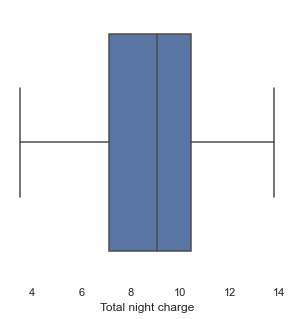

In [29]:
# Check for Outlier
sns.boxplot(x='Total night charge', data = check)

In [30]:
check

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
69,TX,150,510,No,No,0.0,178.9,101,30.41,169.1,110,14.37,148.6,NaN,6.69,13.8,3.0,3.73,4.0,True
102,VT,135,415,No,No,0.0,151.7,82,25.79,119.0,105,10.12,180.0,NaN,8.10,10.5,6.0,2.84,0.0,False
266,RI,114,510,No,Yes,28.0,225.8,94,38.39,193.0,117,16.41,232.4,NaN,10.46,8.4,9.0,2.27,4.0,False
270,PA,101,415,No,No,0.0,206.6,105,35.12,224.9,117,19.12,249.9,NaN,11.25,14.6,3.0,3.94,0.0,False
275,WA,83,415,No,No,0.0,221.4,103,37.64,231.8,103,19.70,122.5,NaN,5.51,9.8,5.0,2.65,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,NE,31,415,No,No,0.0,97.5,129,16.58,260.4,78,22.13,88.7,NaN,3.99,7.0,5.0,1.89,1.0,False
3088,AK,100,415,No,Yes,29.0,213.6,127,36.31,175.9,82,14.95,207.2,NaN,9.32,8.9,3.0,2.40,1.0,False
3143,SC,104,415,No,No,0.0,109.1,141,18.55,187.1,140,15.90,216.6,NaN,9.75,10.0,4.0,2.70,3.0,False
3158,RI,33,415,No,No,0.0,184.4,111,31.35,203.8,110,17.32,237.4,NaN,10.68,9.3,5.0,2.51,3.0,False


In [31]:
check['Total night minutes'].median()

201.4

In [32]:
round(check['Total night minutes'].mean(),2)

198.61

In [33]:
# Fill missing Total night calls with mean
newdata2["Total night calls"] = newdata2["Number vmail messages"].fillna(check['Total night minutes'].mean())

In [34]:
missing(newdata2).head(3)

,Missing_Number,Missing_Percent
Total intl calls,18,0.540054
State,0,0.000000
Account length,0,0.000000


In [35]:
check2 = newdata2.loc[newdata2['Total intl calls'].isna()]
check2

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
179,KS,70,408,No,No,0.0,232.1,122,39.46,292.3,112,24.85,201.2,0.0,9.05,0.0,NaN,0.0,3.0,False
343,IN,98,408,No,Yes,21.0,64.6,98,10.98,176.1,86,14.97,244.8,21.0,11.02,0.0,NaN,0.0,2.0,False
488,VT,165,510,No,No,0.0,242.9,126,41.29,209.8,65,17.83,228.4,0.0,10.28,0.0,NaN,0.0,1.0,False
595,HI,87,408,No,Yes,28.0,151.4,95,25.74,152.4,97,12.95,250.1,28.0,11.25,0.0,NaN,0.0,1.0,False
712,MO,106,415,No,No,0.0,114.4,104,19.45,78.3,101,6.66,232.7,0.0,10.47,0.0,NaN,0.0,2.0,False
878,WI,62,415,No,No,0.0,281.0,66,47.77,160.6,108,13.65,77.9,0.0,3.51,0.0,NaN,0.0,1.0,False
1028,KS,70,415,No,No,0.0,222.8,114,37.88,215.9,113,18.35,223.5,0.0,10.06,0.0,NaN,0.0,1.0,False
1080,OH,114,415,No,No,0.0,191.5,88,32.56,175.2,78,14.89,220.3,0.0,9.91,0.0,NaN,0.0,0.0,False
1400,VA,115,415,No,No,0.0,132.0,90,22.44,197.5,75,16.79,175.8,0.0,7.91,0.0,NaN,0.0,3.0,False
1564,VT,137,510,No,No,0.0,97.5,95,16.58,195.8,82,16.64,288.8,0.0,13.00,0.0,NaN,0.0,1.0,False


In [36]:
check2 = newdata2.loc[newdata2['Total intl calls'].isna()]
print('Max:',check2['Total intl minutes'].max())
print('Min:',check2['Total intl minutes'].min())

Max: 0.0
Min: 0.0


In [37]:
check2['Total intl minutes'].unique()

array([0.])

In [38]:
# Fill missing Total_intl_calls with Zeros because Total_intl_minutes is Zero
newdata2["Total intl calls"] = newdata2["Total intl calls"].fillna(0)

In [39]:
missing(newdata2).head()

,Missing_Number,Missing_Percent
State,0,0.0
Account length,0,0.0
Customer service calls,0,0.0
Total intl charge,0,0.0
Total intl calls,0,0.0


In [40]:
import openpyxl as xls
excel_file = pd.ExcelWriter('Churn.xlsx')
newdata2.to_excel(excel_file)
excel_file.save()

## 3.3 Count and visualize the number of churn and non-churn customers.

In [41]:
newdata2.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

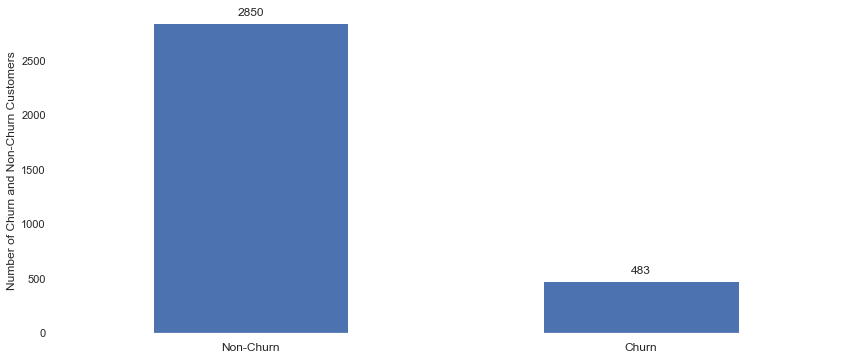

In [42]:
ax = newdata2.Churn.value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Churn and Non-Churn Customers')

# Rotate x-axis label
plt.xticks(rotation='360')
# Rename x-axis label
plt.xticks([0,1],['Non-Churn', 'Churn'], fontsize = 12)

# Insert Data Label
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

<AxesSubplot:title={'center':'Percentage of Churn'}, ylabel='Churn'>

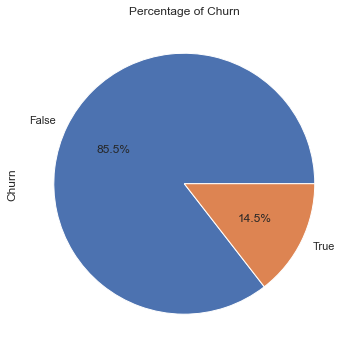

In [43]:
newdata2['Churn'].value_counts().plot.pie(autopct='%1.1f%%',title = "Percentage of Churn",figsize=(14,6))

## 3.4 Calculate the average time for both churned/non-churned users spent on phone during day time. Visualize the relationship between these two variables.

In [44]:
columns= ("Total intl calls","Total intl minutes","Total intl charge")

In [45]:
ctt = newdata2.groupby("Churn")[columns].agg('mean').round(2)
ctt

,Total intl calls,Total intl minutes,Total intl charge
Churn,,,
False,4.53,10.16,2.74
True,4.16,10.70,2.89


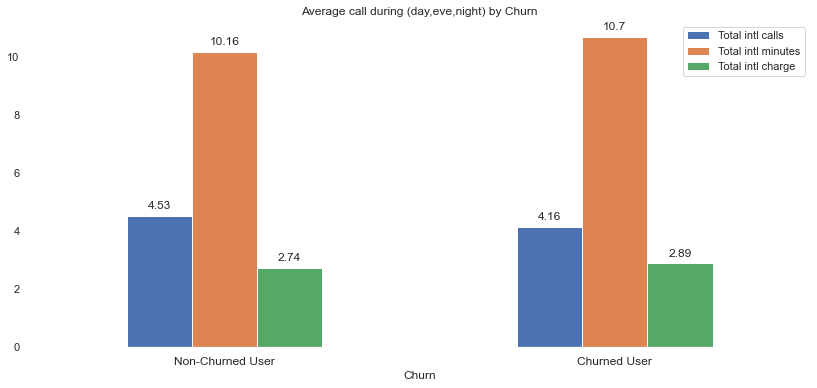

In [46]:
dx =ctt.plot.bar(title ='Average call during (day,eve,night) by Churn',figsize=(14,6));

# Rotate x-axis label
plt.xticks(rotation='360')
# Rename x-axis label
plt.xticks([0,1],['Non-Churned User', 'Churned User'], fontsize = 12)
# Insert Data Label
for p in dx.patches:
    dx.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

In [47]:
newdata2.groupby("Churn").describe()

Account length                                                        \
               count        mean       std  min   25%    50%    75%    max   
Churn                                                                        
False         2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0   
True           483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0   

      Area code              ... Total intl charge       \
          count        mean  ...               75%  max   
Churn                        ...                          
False    2850.0  437.074737  ...              3.24  5.1   
True      483.0  437.817805  ...              3.46  5.4   

      Customer service calls                                               
                       count      mean       std  min  25%  50%  75%  max  
Churn                                                                      
False                 2850.0  1.449825  1.163883  0.0  1.0  1.0  2.0  8.0  
True                   483.0  2.229814  1.853275  0.0  1.0  2.0  4.0  9.0  

[2 rows x 128 columns]

In [48]:
columns2= ("Total day minutes","Total eve minutes","Total night minutes")

In [49]:
ctt2 = newdata2.groupby("Churn")[columns2].agg('mean').round(2)
ctt2

,Total day minutes,Total eve minutes,Total night minutes
Churn,,,
False,175.18,199.04,200.13
True,206.91,212.41,205.23


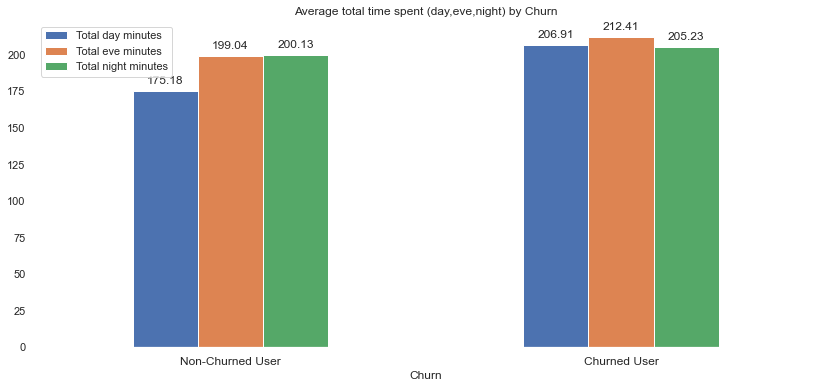

In [50]:
dx2 =ctt2.plot.bar(title ='Average total time spent (day,eve,night) by Churn',figsize=(14,6));

# Rotate x-axis label
plt.xticks(rotation='360')
# Rename x-axis label
plt.xticks([0,1],['Non-Churned User', 'Churned User'], fontsize = 12)
# Insert Data Label
for p in dx2.patches:
    dx2.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

In [51]:
columns3 = ("Total intl minutes","Total intl calls","Total intl charge")

In [52]:
ctt3 = newdata2.groupby("International plan")[columns3].agg('mean').round(2)
ctt3

,Total intl minutes,Total intl calls,Total intl charge
International plan,,,
No,10.20,4.47,2.75
Yes,10.63,4.61,2.87


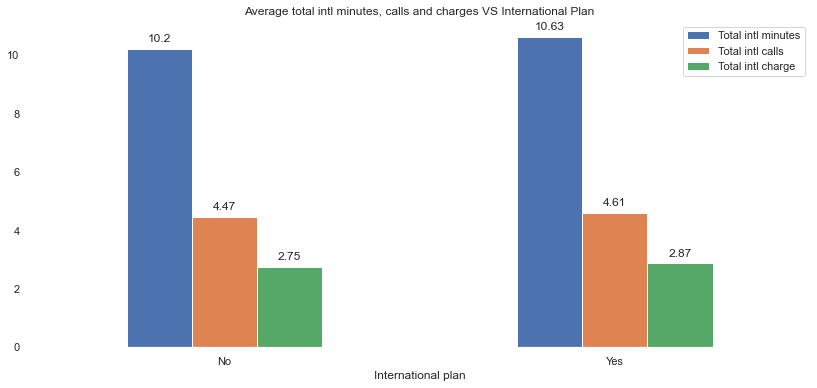

In [53]:
dx3 =ctt3.plot.bar(title ='Average total intl minutes, calls and charges VS International Plan',figsize=(14,6));

# Rotate x-axis label
plt.xticks(rotation='360')

# Insert Data Label
for p in dx3.patches:
    dx3.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

In [54]:
churned_user = newdata2.loc[newdata2['Churn'] == True]

In [55]:
columns4 = ("Total intl minutes","Total intl calls","Total intl charge")
ctt4 = churned_user.groupby("International plan")[columns3].agg('mean').round(2)
ctt4

,Total intl minutes,Total intl calls,Total intl charge
International plan,,,
No,10.27,4.25,2.77
Yes,11.78,3.94,3.18


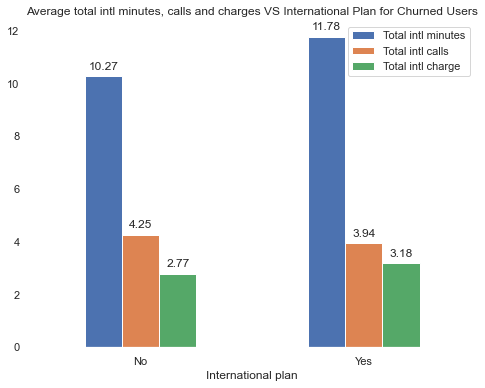

In [56]:
dx4 =ctt4.plot.bar(title ='Average total intl minutes, calls and charges VS International Plan for Churned Users',figsize=(8,6));

# Rotate x-axis label
plt.xticks(rotation='360')

# Insert Data Label
for p in dx4.patches:
    dx4.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

In [57]:
nonchurned_users = newdata2.loc[newdata2['Churn'] == False]

In [58]:
columns5 = ("Total intl minutes","Total intl calls","Total intl charge")
ctt5 = nonchurned_users.groupby("International plan")[columns3].agg('mean').round(2)
ctt5

,Total intl minutes,Total intl calls,Total intl charge
International plan,,,
No,10.19,4.49,2.75
Yes,9.78,5.10,2.64


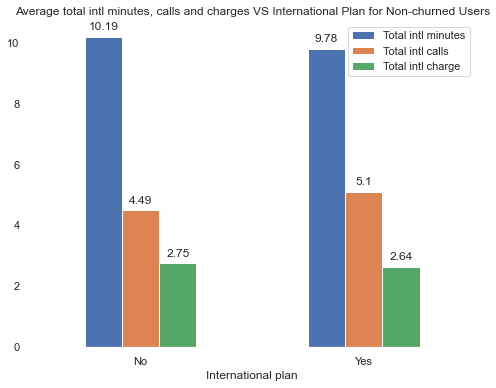

In [59]:
dx5 =ctt5.plot.bar(title ='Average total intl minutes, calls and charges VS International Plan for Non-churned Users',figsize=(8,6));

# Rotate x-axis label
plt.xticks(rotation='360')

# Insert Data Label
for p in dx5.patches:
    dx5.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

In [60]:
columns6 = ("Customer service calls")
ctt6 = newdata2.groupby("Churn")[columns6].agg('mean').round(2)
ctt6

Churn
False    1.45
True     2.23
Name: Customer service calls, dtype: float64

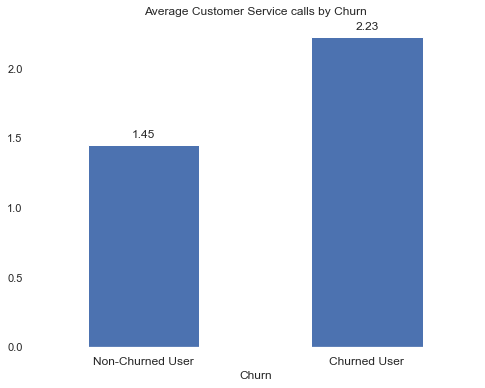

In [61]:
dx6 =ctt6.plot.bar(title ='Average Customer Service calls by Churn',figsize=(8,6));

# Rotate x-axis label
plt.xticks(rotation='360')
# Rename x-axis label
plt.xticks([0,1],['Non-Churned User', 'Churned User'], fontsize = 12)
# Insert Data Label
for p in dx6.patches:
    dx6.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

In [62]:
# Alternative
asa = newdata2[["Total day charge","Total eve charge","Total night charge","Churn"]]
asa2 = asa.groupby("Churn").agg(['mean','median']).round(2)
asa2

Total day charge        Total eve charge        Total night charge  \
                  mean median             mean median               mean   
Churn                                                                      
False            29.78  30.12            16.92  16.97               9.01   
True             35.18  36.99            18.05  17.96               9.24   

              
      median  
Churn         
False   9.01  
True    9.22

In [64]:
columns7= ("Total day charge","Total eve charge","Total night charge")
ctt7 = newdata2.groupby("Churn")[columns7].agg('mean').round(2)
ctt7

,Total day charge,Total eve charge,Total night charge
Churn,,,
False,29.78,16.92,9.01
True,35.18,18.05,9.24


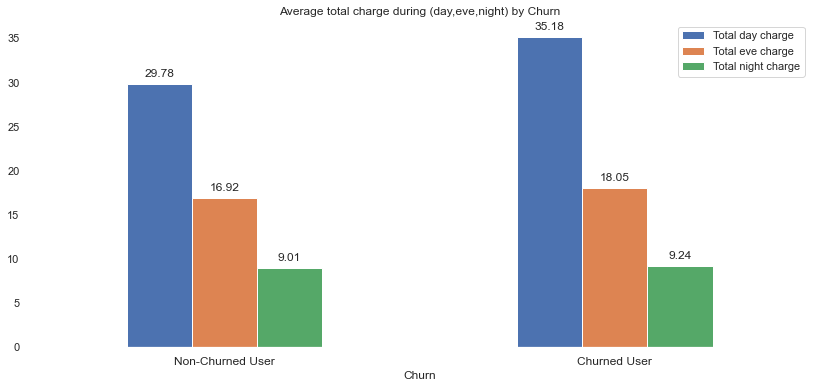

In [65]:
hx =ctt7.plot.bar(title ='Average total charge during (day,eve,night) by Churn',figsize=(14,6));

#define seaborn background colors
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

# Rotate x-axis label
plt.xticks(rotation='360')
# Rename x-axis label
plt.xticks([0,1],['Non-Churned User', 'Churned User'], fontsize = 12)
# Insert Data Label
for p in hx.patches:
    hx.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

In [66]:
newdata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   float64
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   float64
 14  Total night charge      3333 non-null   

## 3.5 Display the average of the numerical variables for churned/non-churned users.

In [67]:
churned_user = newdata2.loc[newdata2["Churn"] == True]
nonchurned_users = newdata2.loc[newdata2["Churn"] == False]

In [68]:
int_churned_user = newdata2.loc[(newdata2["Churn"] == True) & (newdata2["International plan"] == 'Yes')]
nonint_nonchurned_users = newdata2.loc[(newdata2["Churn"] == False) & (newdata2["International plan"] == 'Yes')]

In [69]:
for col in churned_user.columns:
    if churned_user[col].dtypes != object:
        print(f'{col} (mean) :{round(churned_user[col].mean(),2)}')

Account length (mean) :102.66
Area code (mean) :437.82
Number vmail messages (mean) :5.12
Total day minutes (mean) :206.91
Total day calls (mean) :101.34
Total day charge (mean) :35.18
Total eve minutes (mean) :212.41
Total eve calls (mean) :100.56
Total eve charge (mean) :18.05
Total night minutes (mean) :205.23
Total night calls (mean) :5.12
Total night charge (mean) :9.24
Total intl minutes (mean) :10.7
Total intl calls (mean) :4.16
Total intl charge (mean) :2.89
Customer service calls (mean) :2.23
Churn (mean) :1.0


In [70]:
for col in nonchurned_users.columns:
    if nonchurned_users[col].dtypes != object:
        print(f'{col} (mean) :{round(nonchurned_users[col].mean(),2)}')

Account length (mean) :100.79
Area code (mean) :437.07
Number vmail messages (mean) :8.6
Total day minutes (mean) :175.18
Total day calls (mean) :100.28
Total day charge (mean) :29.78
Total eve minutes (mean) :199.04
Total eve calls (mean) :100.04
Total eve charge (mean) :16.92
Total night minutes (mean) :200.13
Total night calls (mean) :8.6
Total night charge (mean) :9.01
Total intl minutes (mean) :10.16
Total intl calls (mean) :4.53
Total intl charge (mean) :2.74
Customer service calls (mean) :1.45
Churn (mean) :0.0


In [71]:
for col in int_churned_user.columns:
    if int_churned_user[col].dtypes != object:
        print(f'{col} (mean) :{round(int_churned_user[col].mean(),2)}')

Account length (mean) :104.91
Area code (mean) :443.18
Number vmail messages (mean) :7.82
Total day minutes (mean) :193.63
Total day calls (mean) :98.78
Total day charge (mean) :32.92
Total eve minutes (mean) :209.31
Total eve calls (mean) :99.45
Total eve charge (mean) :17.79
Total night minutes (mean) :194.64
Total night calls (mean) :7.82
Total night charge (mean) :8.76
Total intl minutes (mean) :11.78
Total intl calls (mean) :3.94
Total intl charge (mean) :3.18
Customer service calls (mean) :1.61
Churn (mean) :1.0


In [72]:
for col in nonint_nonchurned_users.columns:
    if nonint_nonchurned_users[col].dtypes != object:
        print(f'{col} (mean) :{round(nonint_nonchurned_users[col].mean(),2)}')

Account length (mean) :103.46
Area code (mean) :443.67
Number vmail messages (mean) :8.94
Total day minutes (mean) :183.83
Total day calls (mean) :102.05
Total day charge (mean) :31.25
Total eve minutes (mean) :199.98
Total eve calls (mean) :101.25
Total eve charge (mean) :17.0
Total night minutes (mean) :197.71
Total night calls (mean) :8.94
Total night charge (mean) :8.9
Total intl minutes (mean) :9.78
Total intl calls (mean) :5.1
Total intl charge (mean) :2.64
Customer service calls (mean) :1.36
Churn (mean) :0.0


In [73]:
len(churned_user)

483

In [74]:
len(nonchurned_users)

2850

## 3.6 What is the relationship between having international plan, and the average length/count/charge of international calls? Can we conclude this company charges differently for the international calls if the customer has International plan?

In [75]:
newdata2

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25.0,265.1,110,45.07,197.4,99,16.78,244.7,25.0,11.01,10.0,3.0,2.70,1.0,False
1,OH,107,415,No,Yes,26.0,161.6,123,27.47,195.5,103,16.62,254.4,26.0,11.45,13.7,3.0,3.70,1.0,False
2,NJ,137,415,No,No,0.0,243.4,114,41.38,121.2,110,10.30,162.6,0.0,7.32,12.2,5.0,3.29,0.0,False
3,OH,84,408,Yes,No,0.0,299.4,71,50.90,61.9,88,5.26,196.9,0.0,8.86,6.6,7.0,1.78,2.0,False
4,OK,75,415,Yes,No,0.0,166.7,113,28.34,148.3,122,12.61,186.9,0.0,8.41,10.1,3.0,2.73,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36.0,156.2,77,26.55,215.5,126,18.32,279.1,36.0,12.56,9.9,6.0,2.67,2.0,False
3329,WV,68,415,No,No,0.0,231.1,57,39.29,153.4,55,13.04,191.3,0.0,8.61,9.6,4.0,2.59,3.0,False
3330,RI,28,510,No,No,0.0,180.8,109,30.74,288.8,58,24.55,191.9,0.0,8.64,14.1,6.0,3.81,2.0,False
3331,CT,184,510,Yes,No,0.0,213.8,105,36.35,159.6,84,13.57,139.2,0.0,6.26,5.0,10.0,1.35,2.0,False


In [76]:
data["International plan"].value_counts()

No     3084
Yes     327
Name: International plan, dtype: int64

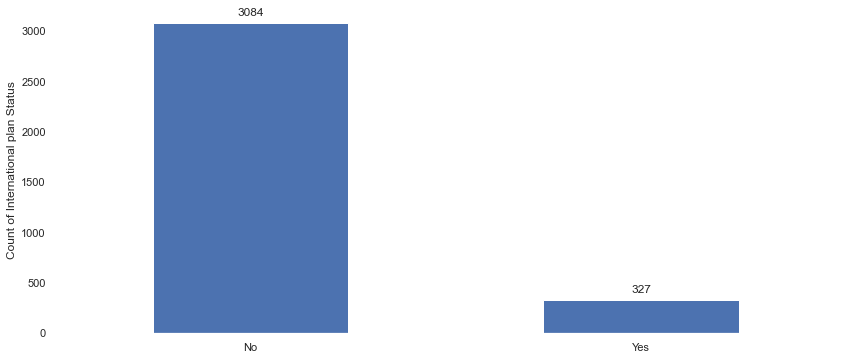

In [77]:
ax2 = data["International plan"].value_counts().plot(kind='bar', figsize=(14,6))
ax2.set_ylabel('Count of International plan Status')
plt.xticks(rotation='360')

# Insert Data Label
for p in ax2.patches:
    ax2.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

In [78]:
newdata2.loc[newdata2['International plan'] == 'Yes',["Total intl charge"]].mean().round(2)

Total intl charge    2.87
dtype: float64

In [79]:
newdata2.loc[newdata2['International plan'] == 'No',["Total intl charge"]].mean().round(2)

Total intl charge    2.75
dtype: float64

The total international charge with international plan is higher compared 
to the total international charge with no international plan. We can't concluded that this conclusion is true
since the number of sample are biased.

## 3.7 For non-churned users who don't have international plan, what is the maximum length of international calls?

In [80]:
newdata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   float64
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   float64
 14  Total night charge      3333 non-null   

In [81]:
cobo = nonchurned_users.loc[nonchurned_users['International plan'] == 'No',['State','Total intl charge','Total intl minutes']]
cobo.sort_values(by='Total intl charge',ascending=False).head()

,State,Total intl charge,Total intl minutes
314,ID,5.10,18.9
1816,OR,4.97,18.4
535,NE,4.91,18.2
2371,IL,4.91,18.2
1257,UT,4.86,18.0


In [82]:
nonchurned_users.loc[nonchurned_users['International plan'] == 'No',['Total intl minutes']].max()

Total intl minutes    18.9
dtype: float64

In [83]:
cobo2 = churned_user.loc[churned_user['International plan'] == 'No',['State','Total intl charge','Total intl minutes']]
cobo2.sort_values(by='Total intl charge',ascending=False).head()

,State,Total intl charge,Total intl minutes
2816,ID,4.94,18.3
2238,NE,4.67,17.3
1984,TN,4.43,16.4
2606,AR,4.35,16.1
156,OH,4.27,15.8


In [84]:
cobo = nonchurned_users.loc[nonchurned_users['International plan'] == 'Yes',['State','Total intl charge','Total intl minutes']]
cobo.sort_values(by='Total intl charge',ascending=False).head()

,State,Total intl charge,Total intl minutes
2260,IN,3.51,13.0
2911,NM,3.51,13.0
2003,OR,3.51,13.0
2316,CT,3.48,12.9
1882,HI,3.48,12.9


In [85]:
nonchurned_users.loc[nonchurned_users['International plan'] == 'Yes',['Total intl minutes']].max()

Total intl minutes    13.0
dtype: float64

In [86]:
cobo2 = churned_user.loc[churned_user['International plan'] == 'Yes',['State','Total day charge','Total eve charge','Total intl charge','Total intl minutes']]
cobo2.sort_values(by='Total intl charge',ascending=False).head()

,State,Total day charge,Total eve charge,Total intl charge,Total intl minutes
115,ME,33.46,21.67,5.40,20.0
1420,MI,25.40,14.61,4.83,17.9
214,FL,38.54,19.39,4.75,17.6
502,MI,36.87,17.63,4.73,17.5
1651,CT,38.30,9.20,4.67,17.3


In [87]:
churned_user.loc[churned_user['International plan'] == 'Yes',['Total intl minutes']].max()

Total intl minutes    20.0
dtype: float64

In [88]:
churned_user.loc[churned_user['International plan'] == 'No',['Total intl minutes']].max()

Total intl minutes    18.3
dtype: float64

In [89]:
nonchurned_users.loc[nonchurned_users['International plan'] == 'Yes',['Total intl charge']].max()

Total intl charge    3.51
dtype: float64

In [90]:
churned_user.loc[churned_user['International plan'] == 'Yes',['Total intl charge']].max()

Total intl charge    5.4
dtype: float64

## 3.8 Plot the relationship between the number of customer service calls and churn

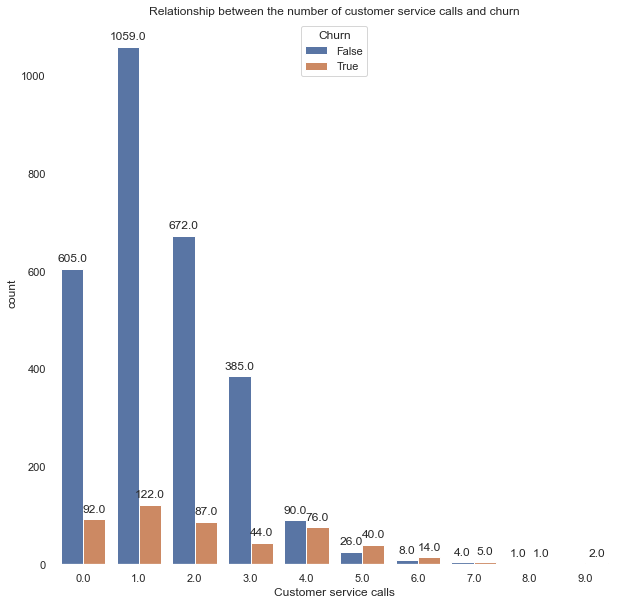

In [213]:
ex = sns.countplot(x="Customer service calls", hue = "Churn", data=newdata2)
sns.set(rc={'figure.figsize':(15,15)})
plt.title('Relationship between the number of customer service calls and churn')

#define seaborn background colors
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

# Insert Data Label
for p in ex.patches:
    ex.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

In [92]:
newdata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   float64
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   float64
 14  Total night charge      3333 non-null   

In [251]:
newdata2.loc[newdata2['Churn'] == True,['Account length','Churn']].sort_values(by='Account length', ascending= False)

,Account length,Churn
1551,225,True
416,224,True
2150,212,True
2700,209,True
197,208,True
...,...,...
394,16,True
2215,13,True
33,12,True
1322,2,True


In [252]:
newdata2.loc[newdata2['Churn'] == True,['Account length','Churn']].value_counts()

Account length  Churn
105             True     9
119             True     9
93              True     8
115             True     8
113             True     8
                        ..
104             True     1
114             True     1
140             True     1
141             True     1
225             True     1
Length: 164, dtype: int64

In [246]:
acc = newdata2[['Account length','Churn']]
acc2 = acc.sort_values(by='Account length', ascending= False)
acc2

,Account length,Churn
817,243,False
1408,232,False
1751,225,False
1551,225,True
1886,224,False
...,...,...
1838,1,False
2879,1,False
923,1,False
1409,1,False


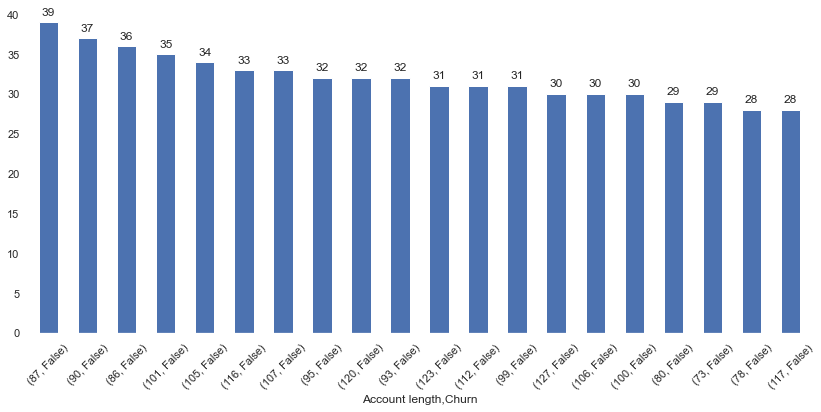

In [245]:
aa = acc2.value_counts().head(20).plot(kind='bar', figsize=(14,6))

# Rotate x-axis label
plt.xticks(rotation='45')

# Insert Data Label
for p in aa.patches:
    aa.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

The strength of Relationship is very weak since the Correlation value lies within (0.01 - 0.20) range.

## 3.9 How many customers we have in each state?

In [112]:
len(newdata2['State'].value_counts())

51

In [113]:
CustomerState = newdata2['State'].value_counts()
CustomerState.head(5)

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

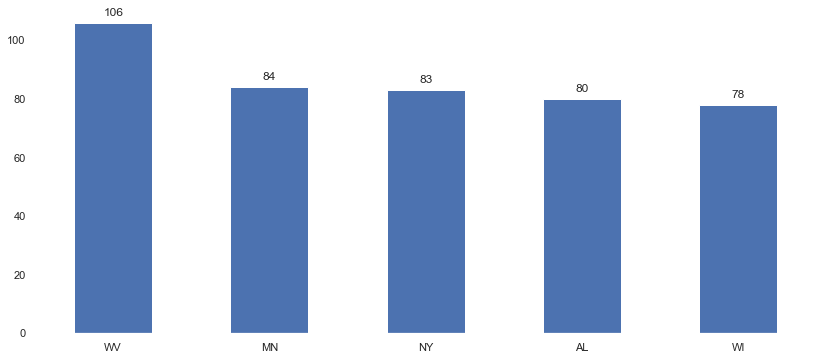

In [114]:
cx = CustomerState.head(5).plot(kind='bar', figsize=(14,6))
# Rotate x-axis label
plt.xticks(rotation='360')

# Insert Data Label
for p in cx.patches:
    cx.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

In [115]:
CustomerState.tail(5)

AK    52
LA    51
PA    45
IA    44
CA    34
Name: State, dtype: int64

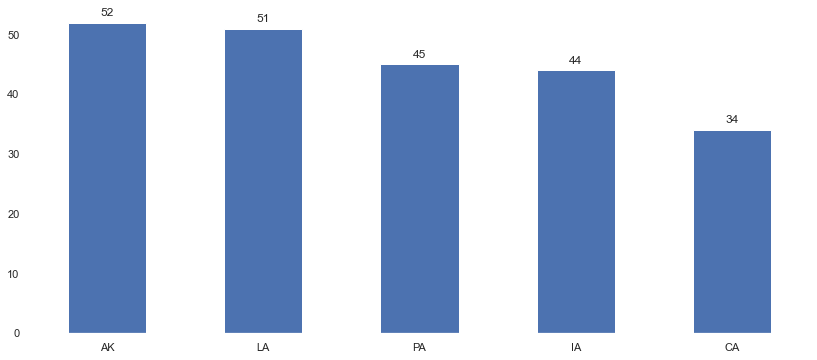

In [116]:
cx2 = CustomerState.tail(5).plot(kind='bar', figsize=(14,6))

# Rotate x-axis label
plt.xticks(rotation='360')

# Insert Data Label
for p in cx2.patches:
    cx2.annotate(format(p.get_height()), 
    (p.get_x() + p.get_width() / 2., 
    p.get_height()), 
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10), 
    textcoords = 'offset points')

## 3.10 Find the states with the highest churn rates.

In [117]:
rate_churn = 483/3333
print(f"Total Churn Rate: {100 * rate_churn:.2f} %")

Total Churn Rate: 14.49 %


In [118]:
ChurnState = churned_user.groupby(['State'])[["Churn"]]
ChurnState.sum().sort_values(by='Churn',ascending=True).head(5)

,Churn
State,
AK,3
IA,3
HI,3
AZ,4
LA,4


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'NJ'),
  Text(1, 0, 'TX'),
  Text(2, 0, 'MD'),
  Text(3, 0, 'MI'),
  Text(4, 0, 'MN')])

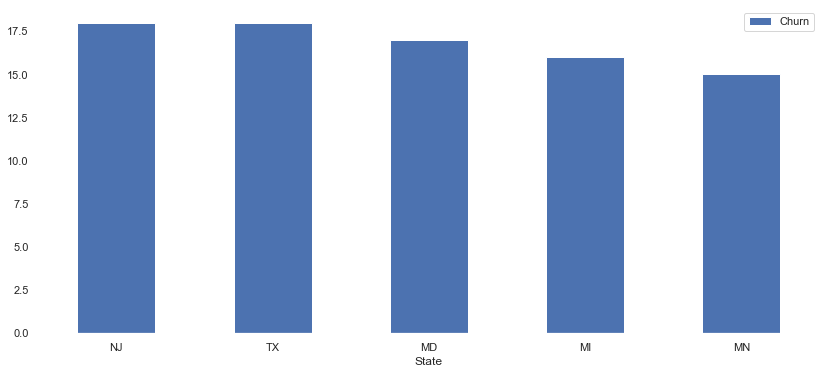

In [214]:
ChurnState.sum().sort_values(by='Churn',ascending=False).head().plot(kind='bar', figsize=(14,6))
# Rotate x-axis label
plt.xticks(rotation='360')

In [120]:
# Highest Churn Rate
SortedChurnRateState= round(ChurnState.sum()/len(ChurnState),2)
SortedChurnRateState.sort_values(by='Churn',ascending=False).head()

,Churn
State,
NJ,0.35
TX,0.35
MD,0.33
MI,0.31
MN,0.29


In [121]:
# Lowest Churn Rate
SortedChurnRateState= round(ChurnState.sum()/len(ChurnState),2)
SortedChurnRateState.sort_values(by='Churn',ascending=True).head()

,Churn
State,
AK,0.06
IA,0.06
HI,0.06
AZ,0.08
LA,0.08


In [122]:
print(f'The total number of state {len(ChurnState)}')

The total number of state 51


In [123]:
akstate = churned_user.loc[churned_user['State'] == 'AK',['State','Total intl charge','Total intl minutes']]
akstate.sort_values(by='Total intl charge',ascending=False)

,State,Total intl charge,Total intl minutes
181,AK,3.21,11.9
3241,AK,3.05,11.3
550,AK,2.13,7.9


In [ ]:
sales.loc[(sales['Sub_Category'] == 'Bike Racks') & (sales['Country'] == 'Canada')]

In [137]:
allchurntype = newdata2.loc[(newdata2['Churn'] == True) | (newdata2['Churn'] == False)]

In [138]:
njstate3 = allchurntype.loc[allchurntype['State'] == 'NJ',['State','Total intl charge','Total intl minutes']]
njstate3

,State,Total intl charge,Total intl minutes
2,NJ,3.29,12.2
39,NJ,3.00,11.1
70,NJ,3.19,11.8
89,NJ,3.75,13.9
116,NJ,3.83,14.2
...,...,...,...
3034,NJ,3.02,11.2
3126,NJ,2.86,10.6
3136,NJ,2.78,10.3
3248,NJ,3.11,11.5


<AxesSubplot:xlabel='Total intl charge'>

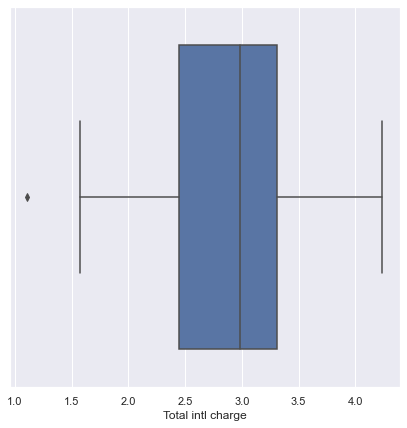

In [201]:
# Check for Outlier
sns.boxplot(x='Total intl charge', data = njstate3)

In [202]:
njstate3['Total intl charge'].mean()

2.9192647058823527

In [203]:
akstate2 = allchurntype.loc[allchurntype['State'] == 'AK',['State','Total intl charge','Total intl minutes']]
len(akstate2)

52

<AxesSubplot:xlabel='Total intl charge'>

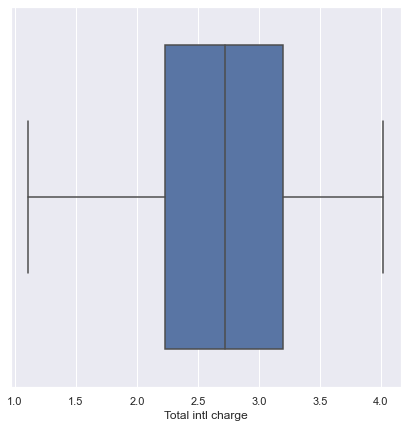

In [204]:
# Check for Outlier
sns.boxplot(x='Total intl charge', data = akstate2)

In [143]:
akstate2['Total intl charge'].mean()

2.705384615384615

In [110]:
njstate = churned_user.loc[churned_user['State'] == 'NJ',['State','Total intl charge','Total intl minutes']]
njstate2 = njstate.sort_values(by='Total intl charge',ascending=False)
njstate2

,State,Total intl charge,Total intl minutes
966,NJ,4.24,15.7
1903,NJ,3.78,14.0
2731,NJ,3.75,13.9
89,NJ,3.75,13.9
946,NJ,3.62,13.4
2660,NJ,3.62,13.4
1105,NJ,3.48,12.9
2113,NJ,3.16,11.7
1585,NJ,3.08,11.4
787,NJ,3.00,11.1


## 3.11 Visualize the relationship between each numerical variable and Churn. Do the churned and non-churned users have the same behavior?

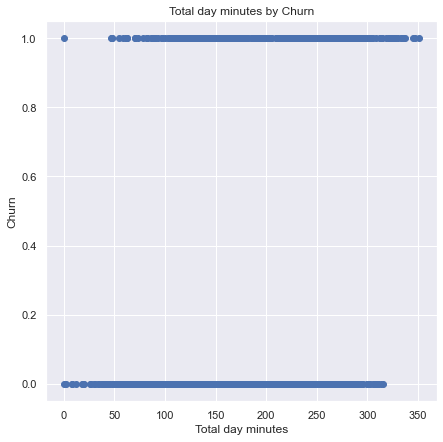

In [205]:
plt.scatter(x = 'Total day minutes', y = 'Churn', data = allchurntype)
plt.title("Total day minutes by Churn")
plt.xlabel('Total day minutes')
plt.ylabel('Churn');

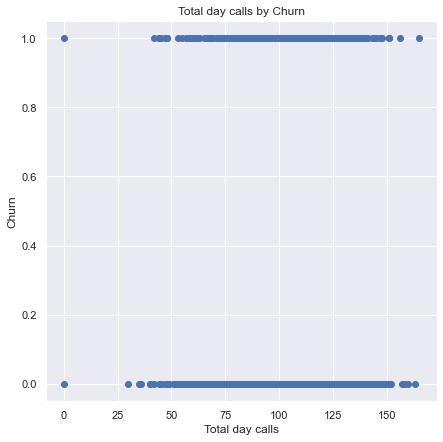

In [206]:
plt.scatter(x = 'Total day calls', y = 'Churn', data = allchurntype)
plt.title("Total day calls by Churn")
plt.xlabel('Total day calls')
plt.ylabel('Churn');

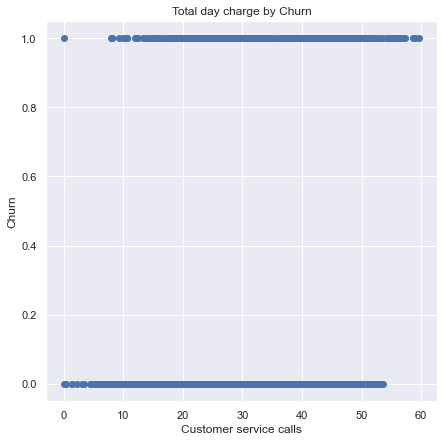

In [207]:
plt.scatter(x = 'Total day charge', y = 'Churn', data = allchurntype)
plt.title("Total day charge by Churn")
plt.xlabel('Customer service calls')
plt.ylabel('Churn');

In [147]:
corr_matrix = newdata2.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn                     1.000000
Customer service calls    0.208750
Total day minutes         0.205151
Total day charge          0.205151
Total eve minutes         0.092796
Total eve charge          0.092786
Total intl charge         0.068259
Total intl minutes        0.068239
Total night charge        0.035496
Total night minutes       0.035493
Total day calls           0.018459
Account length            0.016541
Total eve calls           0.009233
Area code                 0.006174
Total intl calls         -0.052844
Total night calls        -0.089728
Number vmail messages    -0.089728
Name: Churn, dtype: float64

# 4.  Practice: Distributions

In [148]:
from scipy.stats import norm, poisson, uniform, skew, kurtosis, iqr 

## 4.1 Plot the distribution of the numedical variables. Plot the distribution of the numedical variables for Churned/non-Churned users

In [149]:
for col in newdata2.columns:
    if newdata2[col].dtypes != object:
        print(col)
        print('skewness:',newdata2[col].skew())
        print('kurtosis:',newdata2[col].kurtosis())

Account length
skewness: 0.09660629423135147
kurtosis: -0.10783598057434673
Area code
skewness: 1.126822908805058
kurtosis: -0.7056321953681062
Number vmail messages
skewness: 1.2648236337102594
kurtosis: -0.05112853878624479
Total day minutes
skewness: -0.029077067143188955
kurtosis: -0.019940378849473195
Total day calls
skewness: -0.11178663903979906
kurtosis: 0.2431815245893083
Total day charge
skewness: -0.029083268343274994
kurtosis: -0.01981178724473187
Total eve minutes
skewness: -0.023877456078123447
kurtosis: 0.02562975284428992
Total eve calls
skewness: -0.05556313904148763
kurtosis: 0.20615646799830145
Total eve charge
skewness: -0.02385798900760956
kurtosis: 0.025487404808580916
Total night minutes
skewness: 0.008921291065494056
kurtosis: 0.08581607799184665
Total night calls
skewness: 1.2648236337102594
kurtosis: -0.05112853878624479
Total night charge
skewness: 0.008886236769217034
kurtosis: 0.08566317984047211
Total intl minutes
skewness: -0.2451359394861856
kurtosis: 0.

skewness: -0.3533923970704923
kurtosis: 0.7296815501936313


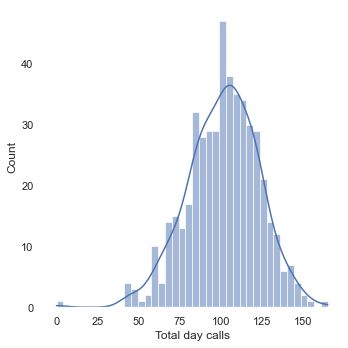

In [150]:
sns.displot(churned_user['Total day calls'], kde = True, bins = 40)
print('skewness:',churned_user['Total day calls'].skew())
print('kurtosis:',churned_user['Total day calls'].kurtosis())

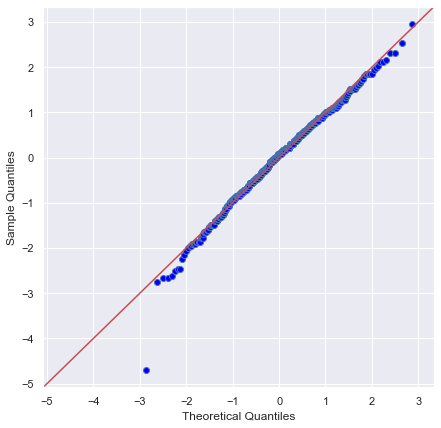

In [208]:
from statsmodels.graphics.gofplots import qqplot
fg = qqplot(churned_user['Total day calls'], fit = True, line = '45')

## 4.2 Is the distribution of `Total day minutes` Normal? Is the distribution of `Total day minutes` for Churned/non-Churned users Normal?

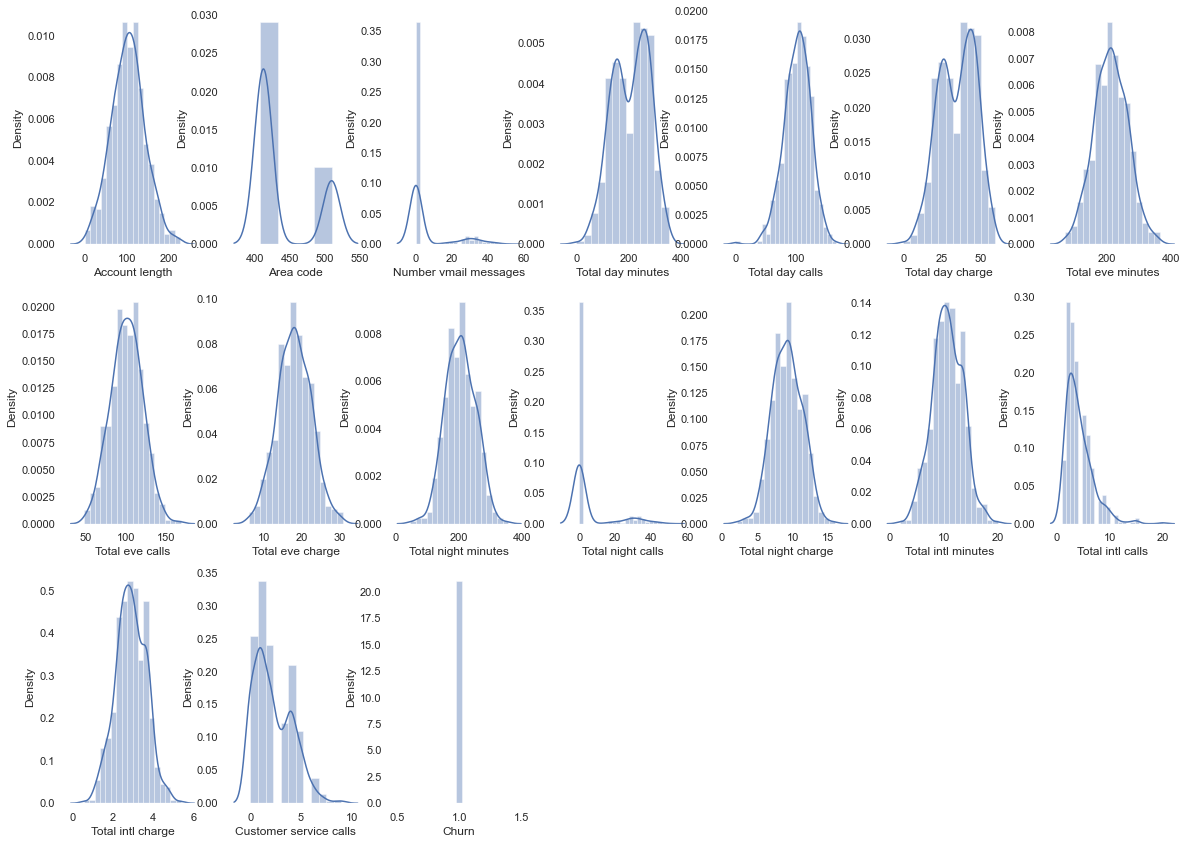

In [152]:
count=1
plt.subplots(figsize=(20,30))
for i in churned_user.columns:
    if churned_user[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.distplot(churned_user[i])
        count+=1

plt.show()

skewness: -0.029077067143188955
kurtosis: -0.019940378849473195
mean: 179.77509750975116
median: 179.4


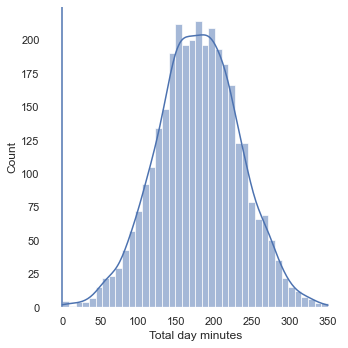

In [153]:
sns.displot(newdata2['Total day minutes'], kde = True, bins = 40)
plt.axvline()
print('skewness:',newdata2['Total day minutes'].skew())
print('kurtosis:',newdata2['Total day minutes'].kurtosis())
print('mean:',newdata2['Total day minutes'].mean())
print('median:',newdata2['Total day minutes'].median())

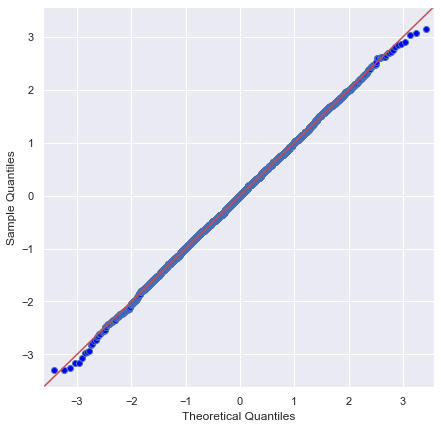

In [209]:
from statsmodels.graphics.gofplots import qqplot
fg = qqplot(newdata2['Total day minutes'], fit = True, line = '45')

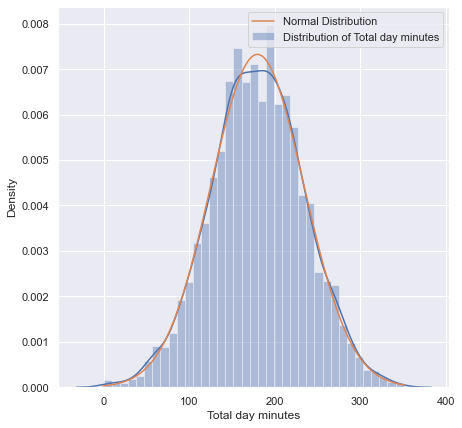

In [210]:
sns.distplot(newdata2['Total day minutes'], label='Distribution of Total day minutes')
sns.set(rc={'figure.figsize':(5,5)})

x=np.linspace(min(newdata2['Total day minutes'])-1, max(newdata2['Total day minutes'])+1, 2000)
y=norm.pdf(x,loc=np.mean(newdata2['Total day minutes']), scale=newdata2['Total day minutes'].std(ddof=1))
plt.plot(x,y, label='Normal Distribution')
plt.legend(loc='upper right');

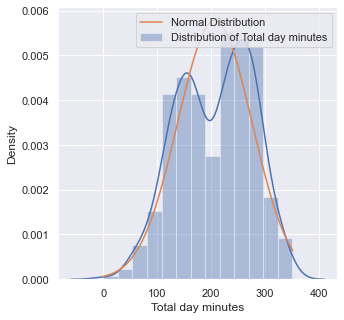

In [156]:
sns.distplot(churned_user['Total day minutes'], label='Distribution of Total day minutes')
sns.set(rc={'figure.figsize':(7,7)})

x=np.linspace(min(churned_user['Total day minutes'])-1, max(churned_user['Total day minutes'])+1, 2000)
y=norm.pdf(x,loc=np.mean(churned_user['Total day minutes']), scale=churned_user['Total day minutes'].std(ddof=1))
plt.plot(x,y, label='Normal Distribution')
plt.legend(loc='upper right');

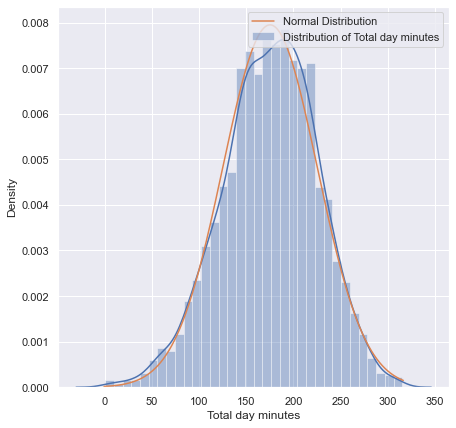

In [157]:
sns.distplot(nonchurned_users['Total day minutes'], label='Distribution of Total day minutes')
sns.set(rc={'figure.figsize':(7,7)})

x=np.linspace(min(nonchurned_users['Total day minutes'])-1, max(nonchurned_users['Total day minutes'])+1, 2000)
y=norm.pdf(x,loc=np.mean(nonchurned_users['Total day minutes']), scale=nonchurned_users['Total day minutes'].std(ddof=1))
plt.plot(x,y, label='Normal Distribution')
plt.legend(loc='upper right');

## 4.3 Display the correlation of the numerical variables

In [158]:
corr_matrix = newdata2.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn                     1.000000
Customer service calls    0.208750
Total day minutes         0.205151
Total day charge          0.205151
Total eve minutes         0.092796
Total eve charge          0.092786
Total intl charge         0.068259
Total intl minutes        0.068239
Total night charge        0.035496
Total night minutes       0.035493
Total day calls           0.018459
Account length            0.016541
Total eve calls           0.009233
Area code                 0.006174
Total intl calls         -0.052844
Total night calls        -0.089728
Number vmail messages    -0.089728
Name: Churn, dtype: float64

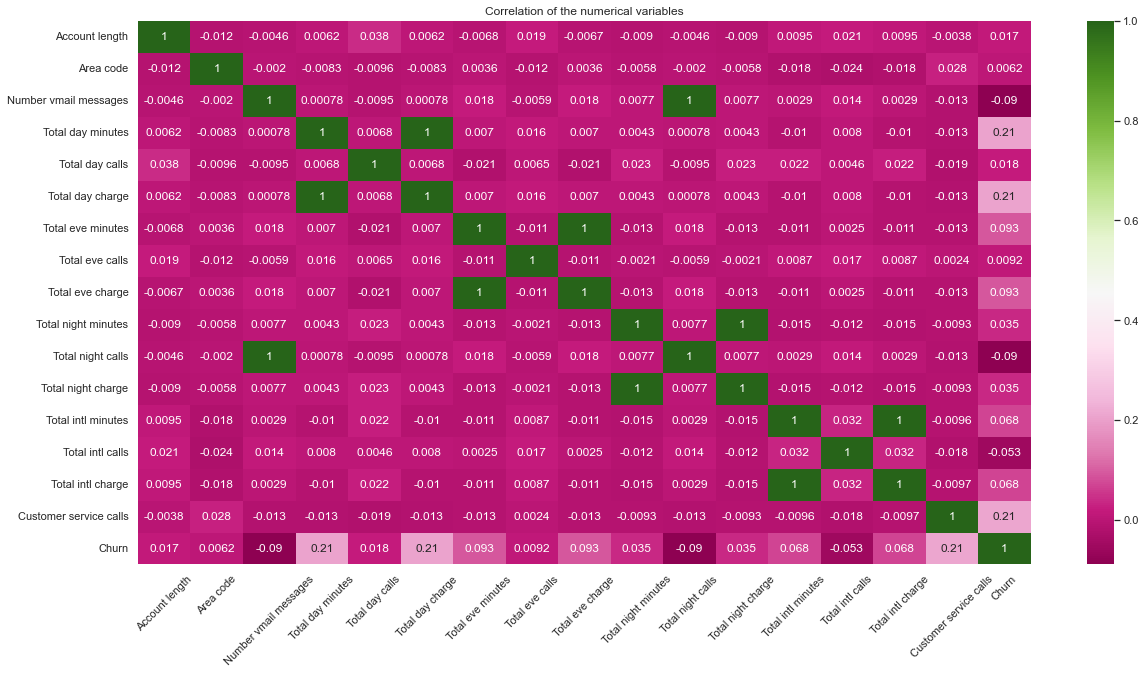

In [159]:
corr_matrix4 = newdata2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix4, cmap='PiYG', annot=True, square=False)
plt.xticks(rotation='45')
plt.title('Correlation of the numerical variables');

# 5. Practice: Sampling

In [160]:
def compare_pop_sample(pop_df, sample_df, col): 
    pop = pop_df[col].value_counts(normalize = True)
    sample = sample_df[col].value_counts(normalize = True)
    pop_sample = pd.concat([pop, sample], 
                           axis = 0, 
                           keys = ["pop", "sample"]).reset_index()
    g1 = sns.catplot(x = "level_1", y = col, hue = "level_0", kind = "bar", data = pop_sample)
    
    # To add data label
    ax1 = g1.facet_axis(0,0)
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

## 5.1 Choose a sample of size 250 using simple random sampling. Is this a good representative of our data considering costumer churn?

In [161]:
np.random.seed(50)
mysample = newdata2.sample(n = 250, replace = False)

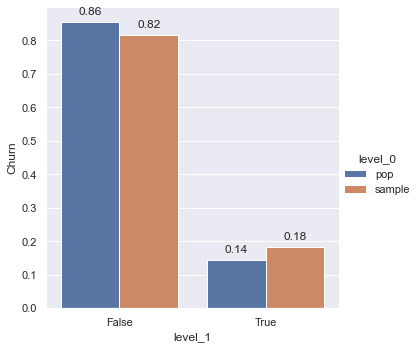

In [162]:
np.random.seed(50)
mysample = newdata2.sample(n = 250, replace = False)
compare_pop_sample(newdata2, mysample, "Churn")

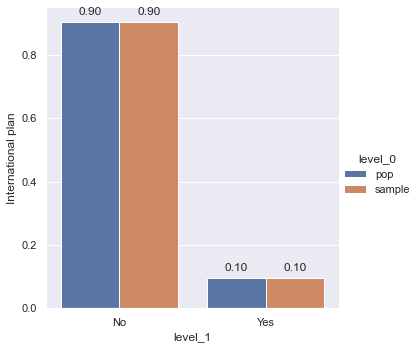

In [163]:
np.random.seed(50)
mysample = newdata2.sample(n = 250, replace = False)
compare_pop_sample(newdata2, mysample, "International plan")

## 5.2 Draw a sample of 8% the customers using stratified sampling by `State`. Is this a good representative of our data considering costumer churn? What is your sample size?

In [164]:
mysample2 = newdata2.groupby('State').apply(lambda x: x.sample(frac = .08, random_state = 42, replace=False))

In [165]:
mysample2.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,265.0,102.222642,39.477643,6.00,74.00,102.00,128.00,199.00
Area code,265.0,435.324528,41.451418,408.00,408.00,415.00,415.00,510.00
Number vmail messages,265.0,7.637736,13.602198,0.00,0.00,0.00,14.00,46.00
Total day minutes,265.0,175.463774,58.548784,40.40,137.80,175.40,220.10,332.90
Total day calls,265.0,100.818868,20.619139,40.00,88.00,101.00,115.00,150.00
Total day charge,265.0,29.829358,9.953390,6.87,23.43,29.82,37.42,56.59
Total eve minutes,265.0,198.293585,52.143309,43.90,162.50,198.40,232.40,354.20
Total eve calls,265.0,100.064151,19.795155,53.00,86.00,102.00,112.00,149.00
Total eve charge,265.0,16.855321,4.432132,3.73,13.81,16.86,19.75,30.11
Total night minutes,265.0,198.975472,47.395943,57.50,165.90,202.10,232.40,326.00


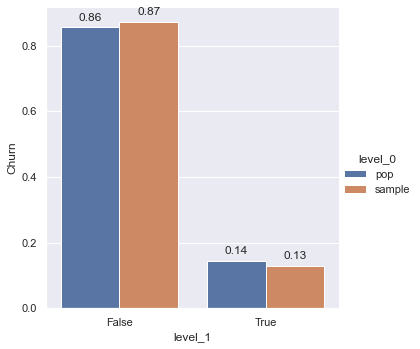

In [166]:
mysample2 = newdata2.groupby('State').apply(lambda x: x.sample(frac = .08, random_state = 42, replace=False))
compare_pop_sample(newdata2, mysample2, "Churn")

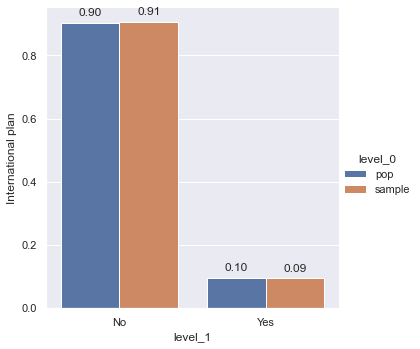

In [167]:
compare_pop_sample(newdata2, mysample2, "International plan")

## 5.3 Draw a one-stage cluster sample from the customers, clustered by `State` by setting the number of clusters to 4 and using simple random sampling of clusters. Is this a good representative of our data considering costumer churn? What is your sample size?

In [168]:
newdata2.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [169]:
# choose clusters with np.random.choice
np.random.seed(50)
clusters = np.random.choice(newdata2.State.unique(), size = 5, replace = False)
clusters

array(['CA', 'UT', 'NC', 'OH', 'IL'], dtype=object)

In [170]:
mysample3 = newdata2[newdata2.State.isin(clusters)]
mysample3.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1,OH,107,415,No,Yes,26.0,161.6,123,27.47,195.5,103,16.62,254.4,26.0,11.45,13.7,3.0,3.70,1.0,False
3,OH,84,408,Yes,No,0.0,299.4,71,50.90,61.9,88,5.26,196.9,0.0,8.86,6.6,7.0,1.78,2.0,False
30,IL,142,415,No,No,0.0,84.8,95,14.42,136.7,63,11.62,250.5,0.0,11.27,14.2,6.0,3.83,2.0,False
53,UT,96,415,No,No,0.0,160.2,117,27.23,267.5,67,22.74,228.5,0.0,10.28,9.3,5.0,2.51,2.0,False
61,CA,116,415,No,Yes,34.0,268.6,83,45.66,178.2,142,15.15,166.3,34.0,7.48,11.6,3.0,3.13,2.0,False


In [171]:
len(mysample3)

310

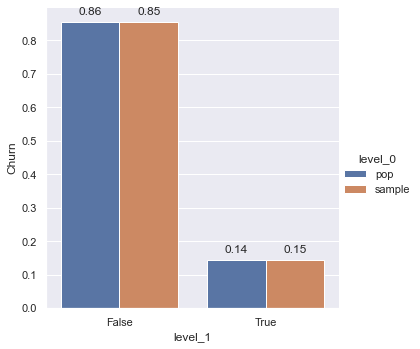

In [172]:
compare_pop_sample(newdata2, mysample3, "Churn")

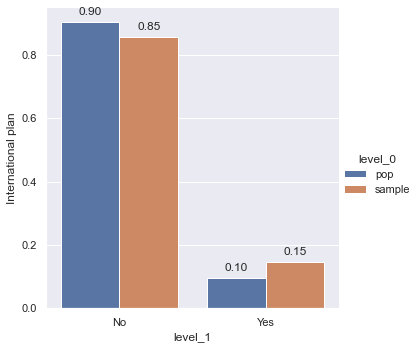

In [173]:
compare_pop_sample(newdata2, mysample3, "International plan")

## 5.4 Draw a systematic sample of size 250 from the customers using with step size 35. Is this a good representative of our data considering costumer churn?

In [174]:
np.random.seed(50)
start = np.random.choice(len(newdata2), 1)
h, n = 35, 250 # h step size , n sample size
index = start + h * (np.arange(n))

In [175]:
start

array([1712])

In [176]:
len(newdata2)

3333

In [177]:
index

array([ 1712,  1747,  1782,  1817,  1852,  1887,  1922,  1957,  1992,
        2027,  2062,  2097,  2132,  2167,  2202,  2237,  2272,  2307,
        2342,  2377,  2412,  2447,  2482,  2517,  2552,  2587,  2622,
        2657,  2692,  2727,  2762,  2797,  2832,  2867,  2902,  2937,
        2972,  3007,  3042,  3077,  3112,  3147,  3182,  3217,  3252,
        3287,  3322,  3357,  3392,  3427,  3462,  3497,  3532,  3567,
        3602,  3637,  3672,  3707,  3742,  3777,  3812,  3847,  3882,
        3917,  3952,  3987,  4022,  4057,  4092,  4127,  4162,  4197,
        4232,  4267,  4302,  4337,  4372,  4407,  4442,  4477,  4512,
        4547,  4582,  4617,  4652,  4687,  4722,  4757,  4792,  4827,
        4862,  4897,  4932,  4967,  5002,  5037,  5072,  5107,  5142,
        5177,  5212,  5247,  5282,  5317,  5352,  5387,  5422,  5457,
        5492,  5527,  5562,  5597,  5632,  5667,  5702,  5737,  5772,
        5807,  5842,  5877,  5912,  5947,  5982,  6017,  6052,  6087,
        6122,  6157,

In [178]:
index % len(newdata2)

array([1712, 1747, 1782, 1817, 1852, 1887, 1922, 1957, 1992, 2027, 2062,
       2097, 2132, 2167, 2202, 2237, 2272, 2307, 2342, 2377, 2412, 2447,
       2482, 2517, 2552, 2587, 2622, 2657, 2692, 2727, 2762, 2797, 2832,
       2867, 2902, 2937, 2972, 3007, 3042, 3077, 3112, 3147, 3182, 3217,
       3252, 3287, 3322,   24,   59,   94,  129,  164,  199,  234,  269,
        304,  339,  374,  409,  444,  479,  514,  549,  584,  619,  654,
        689,  724,  759,  794,  829,  864,  899,  934,  969, 1004, 1039,
       1074, 1109, 1144, 1179, 1214, 1249, 1284, 1319, 1354, 1389, 1424,
       1459, 1494, 1529, 1564, 1599, 1634, 1669, 1704, 1739, 1774, 1809,
       1844, 1879, 1914, 1949, 1984, 2019, 2054, 2089, 2124, 2159, 2194,
       2229, 2264, 2299, 2334, 2369, 2404, 2439, 2474, 2509, 2544, 2579,
       2614, 2649, 2684, 2719, 2754, 2789, 2824, 2859, 2894, 2929, 2964,
       2999, 3034, 3069, 3104, 3139, 3174, 3209, 3244, 3279, 3314,   16,
         51,   86,  121,  156,  191,  226,  261,  2

In [179]:
mysample4 = newdata2.iloc[index % len(newdata2),]

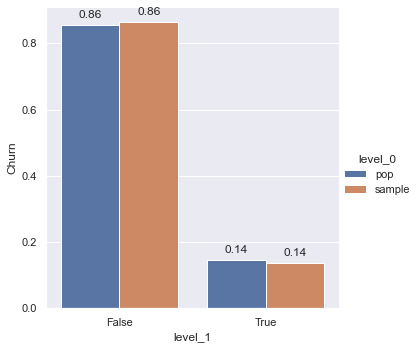

In [180]:
compare_pop_sample(newdata2, mysample4, "Churn")

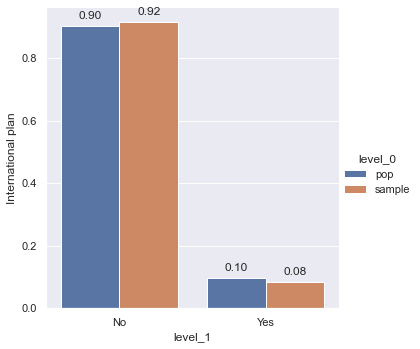

In [181]:
compare_pop_sample(newdata2, mysample4, "International plan")

## 5.5 Draw a multistage sample of size 250 from the customers by selecting 16 random clusters from `State` and stratifying each cluster by `International plan`. Is this a good representative of our data considering costumer churn?

In [182]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [183]:
# stage 1: simple random sample of clusters - 16 random clusters from State
np.random.seed(50)
clusters = np.random.choice(newdata2.State.unique(), size = 16) 
newdata2_stage1 = newdata2[newdata2.State.isin(clusters)]
f=250/newdata2_stage1.shape[0] # Size of 250

# stage 2: stratified sampling - stratifying each cluster by International plan
newdata2_2stage = newdata2_stage1.groupby('International plan').\
apply(lambda x: x.sample(frac = f,random_state = 50, replace=False))

In [184]:
clusters

array(['PA', 'OR', 'IA', 'ME', 'MI', 'AR', 'AL', 'MO', 'MN', 'MO', 'NE',
       'ME', 'MA', 'NJ', 'WI', 'LA'], dtype=object)

In [185]:
# f for fraction
f

0.2756339581036384

In [186]:
newdata2_2stage

State  Account length  Area code International plan  \
International plan                                                            
No                 2574    OR              97        415                 No   
                   3164    MI              52        415                 No   
                   431     NE             148        415                 No   
                   2708    MI             132        408                 No   
                   1551    MI             225        415                 No   
...                       ...             ...        ...                ...   
Yes                2989    MI             108        408                Yes   
                   893     MO             167        415                Yes   
                   358     NE              37        408                Yes   
                   7       MO             147        415                Yes   
                   2146    AR              89        408                Yes   

                        Voice mail plan  Number vmail messages  \
International plan                                               
No                 2574              No                    0.0   
                   3164              No                    0.0   
                   431               No                    0.0   
                   2708              No                    0.0   
                   1551              No                    0.0   
...                                 ...                    ...   
Yes                2989              No                    0.0   
                   893               No                    0.0   
                   358              Yes                   39.0   
                   7                 No                    0.0   
                   2146              No                    0.0   

                         Total day minutes  Total day calls  Total day charge  \
International plan                                                              
No                 2574              146.0              121             24.82   
                   3164              204.4               97             34.75   
                   431               178.3               98             30.31   
                   2708              291.2              104             49.50   
                   1551              165.4              106             28.12   
...                                    ...              ...               ...   
Yes                2989              115.1              114             19.57   
                   893               244.8               91             41.62   
                   358               149.7              122             25.45   
                   7                 157.0               79             26.69   
                   2146              206.9              134             35.17   

                         Total eve minutes  Total eve calls  Total eve charge  \
International plan                                                              
No                 2574              203.0              141             17.26   
                   3164              273.2              128             23.22   
                   431               282.6              110             24.02   
                   2708              234.2              132             19.91   
                   1551              273.7              109             23.26   
...                                    ...              ...               ...   
Yes                2989              211.3               70             17.96   
                   893                60.8              105              5.17   
                   358               211.1               75             17.94   
                   7                 103.1               94              8.76   
                   2146              167.7              105             14.25   

                         Tota

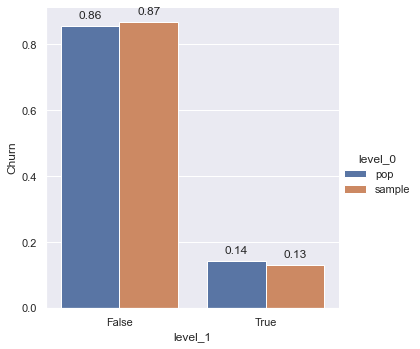

In [187]:
compare_pop_sample(newdata2, newdata2_2stage, "Churn")

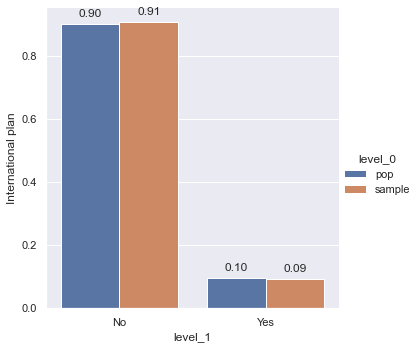

In [188]:
compare_pop_sample(newdata2, newdata2_2stage, "International plan")

# 4.  Practice: SQL

## 4.1. Create a database `Customers.db` including the dataset and the sample

### 4.1.1 import `sqlite3`

In [189]:
import sqlite3

### 4.1.2 Create a SQL connection to the database `Users.db`

In [190]:
conn=sqlite3.connect('Users.db') # Creating the Customers db

### 4.1.2 Transfer the dataframe `data` to the database as the table `population`

In [191]:
data.to_sql('population',conn, if_exists ='replace',index=False)

### 4.1.2 Transfer your sample to the database as the table `Population`

In [192]:
newdata2.to_sql('population',conn, if_exists ='replace',index=False)

### 4.1.2 Transfer your sample to the database as the table `sample`

In [193]:
mysample3.to_sql('sample',conn, if_exists ='replace',index=False)

### 4.1.3 Print the table names in the database to check if the dataframes have been successfully transfered 

In [194]:
tb_names = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in tb_names:
    print(name[0])

population
sample


In [195]:
tb_names = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in tb_names:
    print(name[0])

population
sample


## 4.2 Query the database

To Query a databse using `sqlite3` you can follow the following code format:

`query_result= pd.read_sql_query("your query",conn)`

`query_result`

**Example:** Write a query to look at the first 5 rows of the table `population`

In [196]:
pop_head= pd.read_sql_query("SELECT * FROM sample LIMIT 5",conn)

pop_head

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,OH,107,415,No,Yes,26.0,161.6,123,27.47,195.5,103,16.62,254.4,26.0,11.45,13.7,3.0,3.70,1.0,0
1,OH,84,408,Yes,No,0.0,299.4,71,50.90,61.9,88,5.26,196.9,0.0,8.86,6.6,7.0,1.78,2.0,0
2,IL,142,415,No,No,0.0,84.8,95,14.42,136.7,63,11.62,250.5,0.0,11.27,14.2,6.0,3.83,2.0,0
3,UT,96,415,No,No,0.0,160.2,117,27.23,267.5,67,22.74,228.5,0.0,10.28,9.3,5.0,2.51,2.0,0
4,CA,116,415,No,Yes,34.0,268.6,83,45.66,178.2,142,15.15,166.3,34.0,7.48,11.6,3.0,3.13,2.0,0


## 4.2 Is your sample a good representative of the population regarding `Churn`?

**Hint:**
1. Count the percentage of Churned users in the population and save the result as `pop_churn_pcnt`
2. Count the percentage of Churned users in the sample and save the result as `smp_churn_pcnt`

In [197]:
pop_churn_pcnt = pd.read_sql_query\
("""SELECT round(Count()*100/(SELECT Count() FROM population),2)
AS pop_churn_pcnt 
FROM population 
WHERE Churn = 1""",conn)

pop_churn_pcnt

,pop_churn_pcnt
0,14.0


In [198]:
pop_churn_pcnt = pd.read_sql_query\
("""SELECT round(Count()*100/(SELECT Count() FROM sample),2)
AS smp_churn_pcnt
FROM sample 
WHERE Churn = 1""",conn)

pop_churn_pcnt

,smp_churn_pcnt
0,14.0


###  4.3 Close the connection

In [ ]:
conn.close()